# 1

In [55]:
# Linear algebra
import numpy as np

# data processing
import pandas as pd

# data visualization
import seaborn as sns
%matplotlib inline

from matplotlib import pyplot as plt
from matplotlib import style

# Read input data
with open('titanic.csv') as f:
    df = pd.read_csv(
        f,
        dtype={
            'age': np.float64,
            'sibsp': np.int64,
            'parch': np.int64
        }
    )

print("Nguyễn Hữu Toàn – 6351071071")
# Examine the initial data with the head() and info() functions
df.head(12)


Nguyễn Hữu Toàn – 6351071071


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


In [56]:
df.info()
print("Nguyễn Hữu Toàn – 6351071071")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB
Nguyễn Hữu Toàn – 6351071071


In [57]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)

print(df.describe())
print("Nguyễn Hữu Toàn – 6351071071")


            pclass     survived          age        sibsp        parch         fare        body
count  1309.000000  1309.000000  1046.000000  1309.000000  1309.000000  1308.000000  121.000000
mean      2.294882     0.381971    29.881135     0.498854     0.385027    33.295479  160.809917
std       0.837836     0.486055    14.413500     1.041658     0.865560    51.758668   97.696922
min       1.000000     0.000000     0.166700     0.000000     0.000000     0.000000    1.000000
25%       2.000000     0.000000    21.000000     0.000000     0.000000     7.895800   72.000000
50%       3.000000     0.000000    28.000000     0.000000     0.000000    14.454200  155.000000
75%       3.000000     1.000000    39.000000     1.000000     0.000000    31.275000  256.000000
max       3.000000     1.000000    80.000000     8.000000     9.000000   512.329200  328.000000
Nguyễn Hữu Toàn – 6351071071


# 2

In [58]:
total = df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum() / df.isnull().count() * 100
percent_2 = round(percent_1, 1).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
print(missing_data.head(5))
print("Nguyễn Hữu Toàn – 6351071071")

           Total     %
body        1188  90.8
cabin       1014  77.5
boat         823  62.9
home.dest    564  43.1
age          263  20.1
Nguyễn Hữu Toàn – 6351071071


# 3

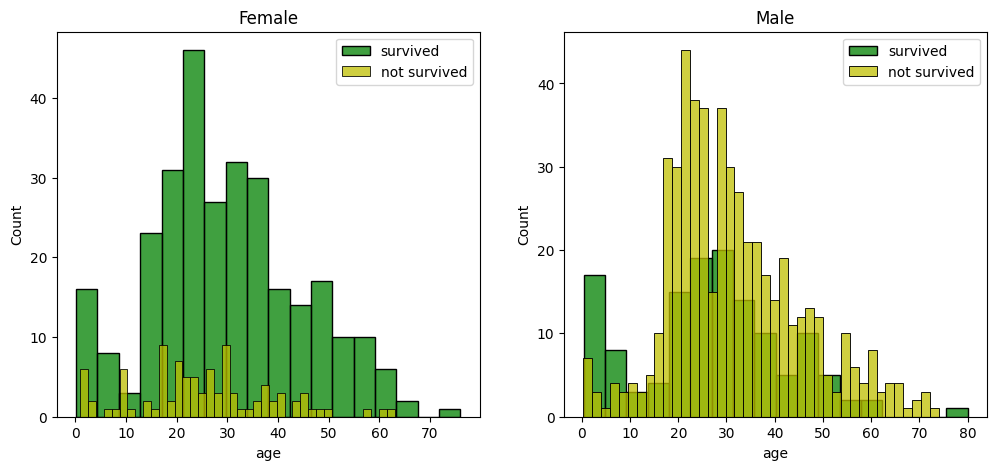

Nguyễn Hữu Toàn – 6351071071


In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

survived = 'survived'
not_survived = 'not survived'

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

women = df[df['sex'] == 'female']
men = df[df['sex'] == 'male']

# Female
sns.histplot(
    women[women['survived'] == 1].age.dropna(),
    bins=18, label=survived, ax=axes[0],
    kde=False, color='g'
)
sns.histplot(
    women[women['survived'] == 0].age.dropna(),
    bins=40, label=not_survived, ax=axes[0],
    kde=False, color='y'
)
axes[0].legend()
axes[0].set_title('Female')

# Male
sns.histplot(
    men[men['survived'] == 1].age.dropna(),
    bins=18, label=survived, ax=axes[1],
    kde=False, color='g'
)
sns.histplot(
    men[men['survived'] == 0].age.dropna(),
    bins=40, label=not_survived, ax=axes[1],
    kde=False, color='y'
)
axes[1].legend()
axes[1].set_title('Male')

plt.show()
print("Nguyễn Hữu Toàn – 6351071071")


# 4

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:723: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Setting a 

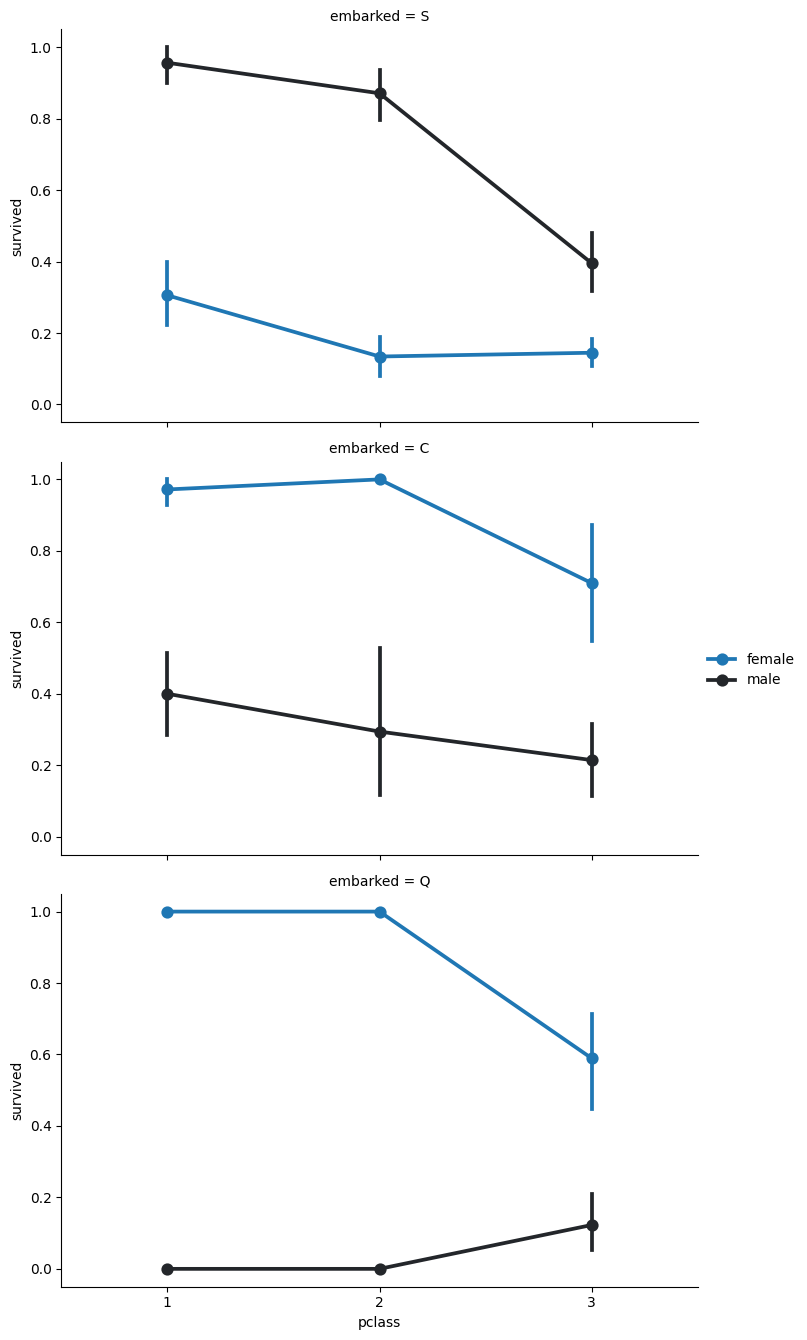

Nguyễn Hữu Toàn – 6351071071


In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.FacetGrid(df, row='embarked', height=4.5, aspect=1.6)
g.map(sns.pointplot, 'pclass', 'survived', 'sex', palette=None)
g.add_legend()

plt.show()
print("Nguyễn Hữu Toàn – 6351071071")


/tmp/ipython-input-4200077349.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='pclass_str', y='survived', data=df, palette=palette)


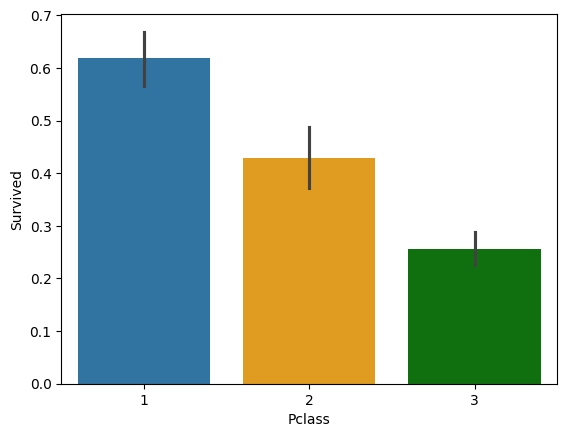

Nguyễn Hữu Toàn – 6351071071


In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

df['pclass_str'] = df['pclass'].astype(str)

palette = {
    '1': sns.color_palette()[0],
    '2': 'orange',
    '3': 'green'
}

sns.barplot(x='pclass_str', y='survived', data=df, palette=palette)
plt.xlabel('Pclass')
plt.ylabel('Survived')
plt.show()
print("Nguyễn Hữu Toàn – 6351071071")


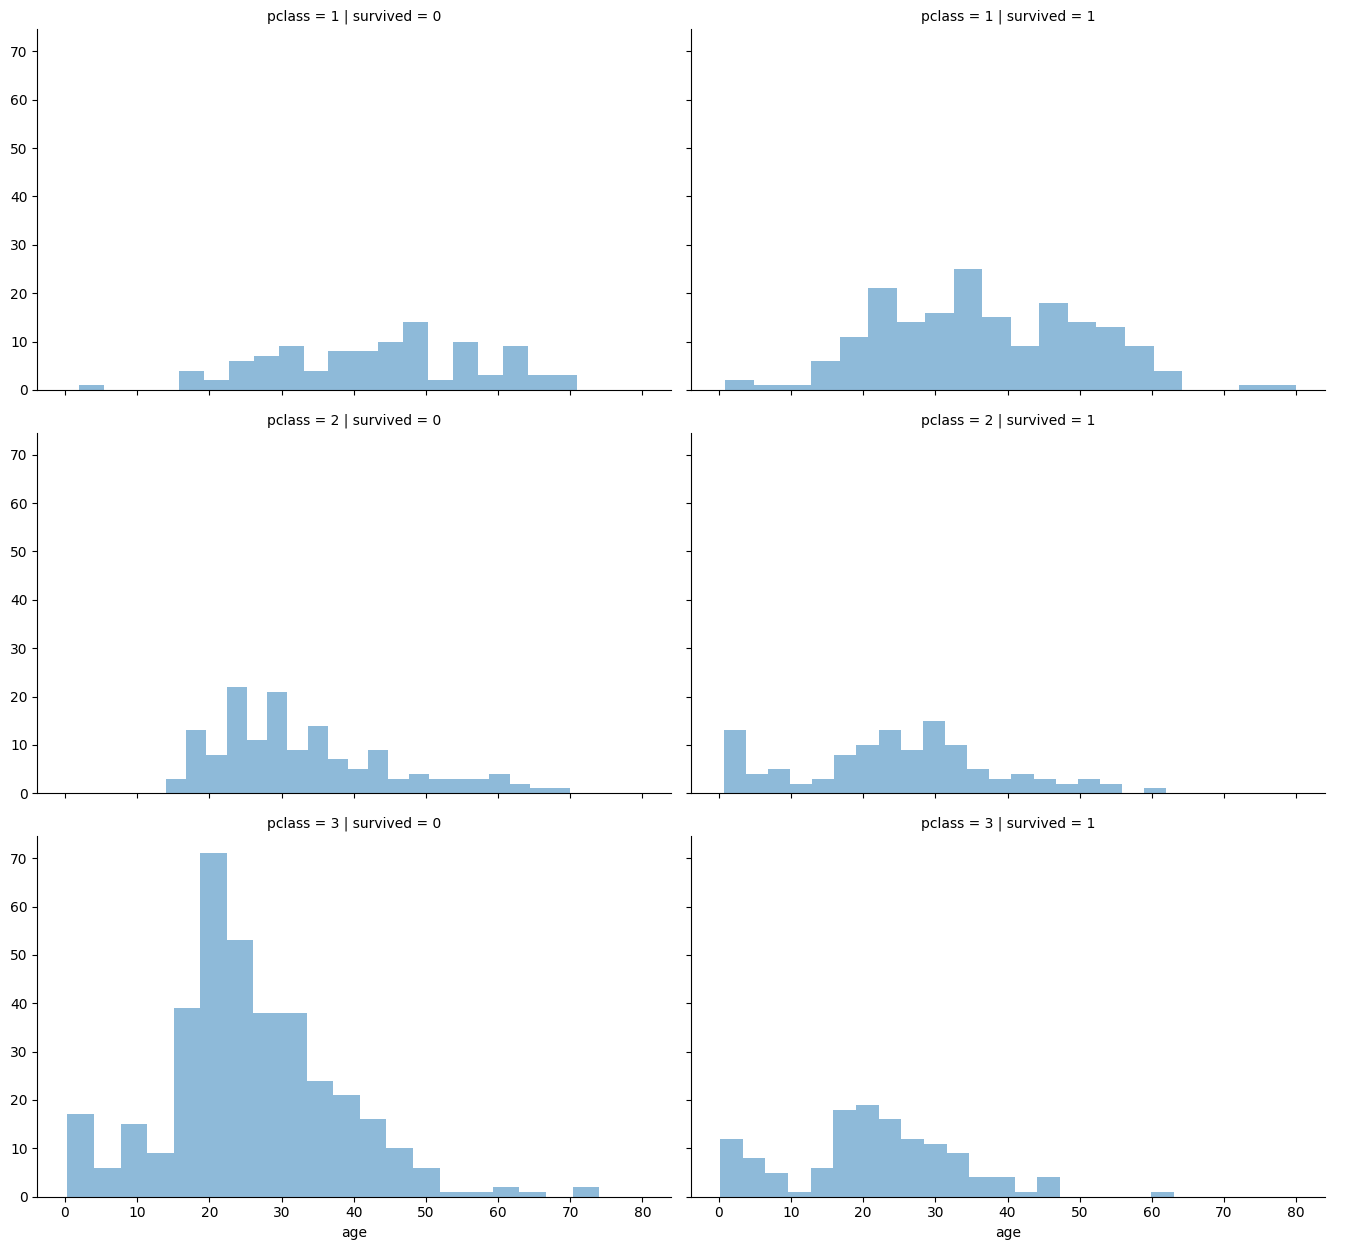

Nguyễn Hữu Toàn – 6351071071


In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

grid = sns.FacetGrid(df, col='survived', row='pclass', height=4.2, aspect=1.6)
grid.map(plt.hist, 'age', alpha=0.5, bins=20)
grid.add_legend()

plt.show()
print("Nguyễn Hữu Toàn – 6351071071")

# 5

In [63]:
print("Nguyễn Hữu Toàn – 6351071071")
df['relatives'] = df['sibsp'] + df['parch']
df.loc[df['relatives'] > 0, 'not_alone'] = 0
df.loc[df['relatives'] == 0, 'not_alone'] = 1
df['not_alone'] = df['not_alone'].astype(int)
df['not_alone'].value_counts()

Nguyễn Hữu Toàn – 6351071071


,count
not_alone,
1,790
0,519


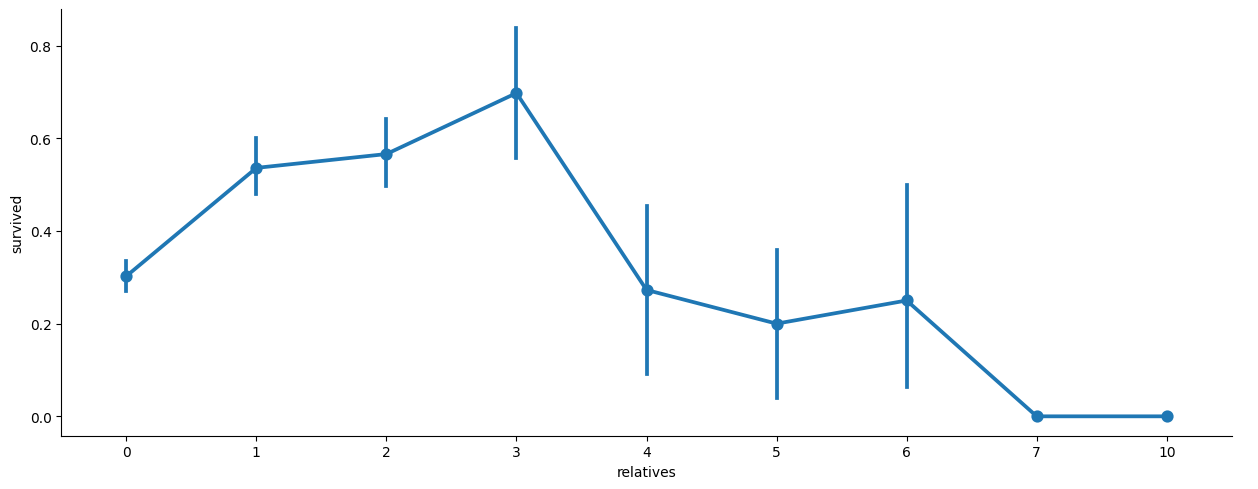

Nguyễn Hữu Toàn – 6351071071


In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.catplot(x='relatives', y='survived', data=df, kind='point', aspect=2.5)
plt.show()
print("Nguyễn Hữu Toàn – 6351071071")

# 6

In [65]:
import re

deck_map = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}

if 'cabin' in df.columns:
    df['cabin'] = df['cabin'].fillna("U0")
    df['deck'] = df['cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    df['deck'] = df['deck'].map(deck_map)
    df['deck'] = df['deck'].fillna(0)
    df['deck'] = df['deck'].astype(int)
    df = df.drop(['cabin'], axis=1)

print(df['ticket'].describe())
print("Nguyễn Hữu Toàn – 6351071071")



count         1309
unique         929
top       CA. 2343
freq            11
Name: ticket, dtype: object
Nguyễn Hữu Toàn – 6351071071


In [68]:
import numpy as np

cols_to_drop = ['ticket', 'boat', 'body', 'home.dest']
df = df.drop([col for col in cols_to_drop if col in df.columns], axis=1)

for dataset in [df]:
    mean = dataset["age"].mean()
    std = dataset["age"].std()
    is_null = dataset["age"].isnull().sum()
    rand_age = np.random.randint(mean - std, mean + std, size=is_null)
    age_slice = dataset["age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["age"] = age_slice
    dataset["age"] = dataset["age"].astype(int)

print(df["age"].isnull().sum())

common_value = 'S'
for dataset in [df]:
    dataset['embarked'] = dataset['embarked'].fillna(common_value)

print(df['embarked'].describe())
print("Nguyễn Hữu Toàn – 6351071071")


0
count     1309
unique       3
top          S
freq       916
Name: embarked, dtype: object
Nguyễn Hữu Toàn – 6351071071
